# Principal Component Analysis for Anomaly Detection

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df = df.drop(['variety'], axis=1)
pca = PCA(n_components=4, random_state=0)
pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [4]:
plt.figure(figsize=(16,4))
sns.pairplot(data=df, hue='variety')

In [5]:
df_pca = pd.DataFrame(pca.fit_transform(df), index=df.index)
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index)

In [6]:
def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

def is_anomaly(data, pca, threshold):
    pca_data = pca.transform(data)
    restored_data = pca.inverse_transform(pca_data)
    loss = np.sum((data - restored_data) ** 2)
    return loss > threshold

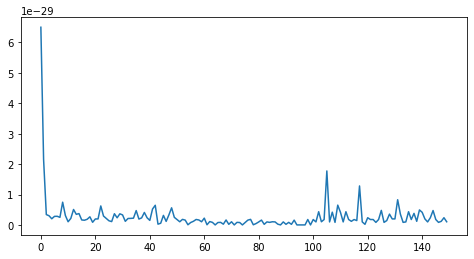

In [7]:
reconstruction_errors = get_anomaly_scores(df, df_restored)
plt.figure(figsize = (8,4))
sns.lineplot(data=reconstruction_errors)
for index, row in df.iterrows():
    if is_anomaly([row], pca, 0.4):
        plt.axvline(row.name, color='r', alpha=0.2)

## Azure Diagnostics Data

In [9]:
df = pd.read_csv("data\pca_data.csv")
df = df.fillna(0)
df = df.pivot_table('Total', ['TimeGenerated [Local Time]'], 'MetricName')
df.reset_index(drop=False, inplace=True)
df.reindex(['TimeGenerated [Local Time]', 'ServiceApiLatency', 'ServiceApiLatency', 'ServiceApiLatency', 'ServiceApiResult'], axis=1)
df.drop(['TimeGenerated [Local Time]'], axis=1, inplace=True)
df.head()

MetricName,Availability,ServiceApiHit,ServiceApiLatency,ServiceApiResult
0,23.0,23.0,982.5,23.0
1,248.5,248.5,4216.5,248.5
2,284.5,284.5,4817.0,284.5
3,59.0,59.0,2094.0,59.0
4,11.5,11.5,834.0,11.5


In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_df.head()

MetricName,Availability,ServiceApiHit,ServiceApiLatency,ServiceApiResult
0,-0.434548,-0.434554,-0.698706,-0.434548
1,2.311898,2.311932,1.869128,2.311898
2,2.750356,2.750395,2.345932,2.750356
3,0.003909,0.003909,0.183838,0.003909
4,-0.574611,-0.574619,-0.816617,-0.574611


In [15]:
pca = PCA(n_components=1, random_state=0)
df_pca = pd.DataFrame(pca.fit_transform(scaled_df), index=scaled_df.index)
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index)
pca.explained_variance_ratio_

array([0.96656127])

In [13]:
reconstruction_errors = get_anomaly_scores(scaled_df, df_restored)

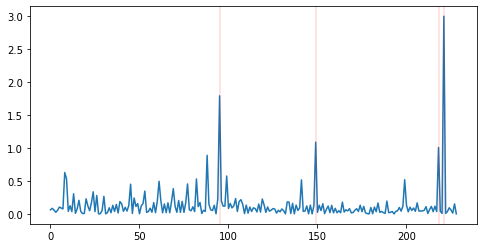

In [14]:
plt.figure(figsize = (8,4))
sns.lineplot(data=reconstruction_errors)
for index, row in scaled_df.iterrows():
    if is_anomaly([row], pca, 1):
        plt.axvline(row.name, color='r', alpha=0.150)